<a href="https://colab.research.google.com/github/jrobledob/2025_APS_Workshop/blob/main/3_Feature_importance_in_multidimentional_data_using_RF_family_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-On Session 1: Applying ML to Multidimensional Epidemiological Data

**Authors**: Jacobo Robledo Buritica (jacoborobledobur@ufl.edu) and A.I. Plex Sula (plexaaron@ufl.edu)

Last update on July 27th, 2025

> **Goals for this training session**\
> At the end of this session, you will be able to\
>  ‑ Filter highly correlated predictors in a dataset\
>  ‑ Compare three wrapper/embedded feature‑selection algorithms (Boruta,
> varSelRF, and VSURF)\
>  ‑ Identify **common key variables**\
>  ‑ Build and cross-validate a Random‑Forest model (competition!)\
>\
> In this module, we will use the **`FHBdataset`**, which is automatically loaded in your workspace.\
> For this exercise, our task will be to predict Fusarium head blight epidemics in wheat in the United States based on a Random forest model. In this task, the the target variable will be `corn` (0 = no epidemic, 1 = epidemic). All other columns in this dataset are candidate predictor variables representing weather-based variable in each location.


In [ ]:
# ────────────────────────────────────────────────────────────────
# 0  Load libraries (installs the first time if missing)
# ────────────────────────────────────────────────────────────────
required <- c("tidyverse", "caret", "Boruta", "varSelRF", "VSURF",
              "ranger", "GGally", "ggcorrplot", "VennDiagram", "pROC", "plotly")
new <- required[!(required %in% installed.packages()[,"Package"])]
if (length(new)) install.packages(new, repos = "https://cloud.r-project.org")

lapply(required, library, character.only = TRUE)
set.seed(568)   # reproducibility

[[1]]
 [1] "shapviz"       "fastshap"      "plotly"        "pROC"         
 [5] "VennDiagram"   "futile.logger" "grid"          "ggcorrplot"   
 [9] "GGally"        "ranger"        "VSURF"         "varSelRF"     
[13] "parallel"      "randomForest"  "Boruta"        "caret"        
[17] "lattice"       "lubridate"     "forcats"       "stringr"      
[21] "dplyr"         "purrr"         "readr"         "tidyr"        
[25] "tibble"        "ggplot2"       "tidyverse"     "stats"        
[29] "graphics"      "grDevices"     "utils"         "datasets"     
[33] "methods"       "base"         

[[2]]
 [1] "shapviz"       "fastshap"      "plotly"        "pROC"         
 [5] "VennDiagram"   "futile.logger" "grid"          "ggcorrplot"   
 [9] "GGally"        "ranger"        "VSURF"         "varSelRF"     
[13] "parallel"      "randomForest"  "Boruta"        "caret"        
[17] "lattice"       "lubridate"     "forcats"       "stringr"      
[21] "dplyr"         "purrr"         "readr"         "tidyr"        
[25] "tibble"        "ggplot2"       "tidyverse"     "stats"        
[29] "graphics"      "grDevices"     "utils"         "datasets"     
[33] "methods"       "base"         

[[3]]
 [1] "shapviz"       "fastshap"      "plotly"        "pROC"         
 [5] "VennDiagram"   "futile.logger" "grid"          "ggcorrplot"   
 [9] "GGally"        "ranger"        "VSURF"         "varSelRF"     
[13] "parallel"      "randomForest"  "Boruta"        "caret"        
[17] "lattice"       "lubridate"     "forcats"       "stringr"      
[21] "dplyr"         "purrr"         "readr"         "tidyr"        
[25] "tibble"        "ggplot2"       "tidyverse"     "stats"        
[29] "graphics"      "grDevices"     "utils"         "datasets"     
[33] "methods"       "base"         

[[4]]
 [1] "shapviz"       "fastshap"      "plotly"        "pROC"         
 [5] "VennDiagram"   "futile.logger" "grid"          "ggcorrplot"   
 [9] "GGally"        "ranger"        "VSURF"         "varSelRF"     
[13] "parallel"      "randomForest"  "Boruta"        "caret"        
[17] "lattice"       "lubridate"     "forcats"       "stringr"      
[21] "dplyr"         "purrr"         "readr"         "tidyr"        
[25] "tibble"        "ggplot2"       "tidyverse"     "stats"        
[29] "graphics"      "grDevices"     "utils"         "datasets"     
[33] "methods"       "base"         

[[5]]
 [1] "shapviz"       "fastshap"      "plotly"        "pROC"         
 [5] "VennDiagram"   "futile.logger" "grid"          "ggcorrplot"   
 [9] "GGally"        "ranger"        "VSURF"         "varSelRF"     
[13] "parallel"      "randomForest"  "Boruta"        "caret"        
[17] "lattice"       "lubridate"     "forcats"       "stringr"      
[21] "dplyr"         "purrr"         "readr"         "tidyr"        
[25] "tibble"        "ggplot2"       "tidyverse"     "stats"        
[29] "graphics"      "grDevices"     "utils"         "datasets"     
[33] "methods"       "base"         

[[6]]
 [1] "shapviz"       "fastshap"      "plotly"        "pROC"         
 [5] "VennDiagram"   "futile.logger" "grid"          "ggcorrplot"   
 [9] "GGally"        "ranger"        "VSURF"         "varSelRF"     
[13] "parallel"      "randomForest"  "Boruta"        "caret"        
[17] "lattice"       "lubridate"     "forcats"       "stringr"      
[21] "dplyr"         "purrr"         "readr"         "tidyr"        
[25] "tibble"        "ggplot2"       "tidyverse"     "stats"        
[29] "graphics"      "grDevices"     "utils"         "datasets"     
[33] "methods"       "base"         

[[7]]
 [1] "shapviz"       "fastshap"      "plotly"        "pROC"         
 [5] "VennDiagram"   "futile.logger" "grid"          "ggcorrplot"   
 [9] "GGally"        "ranger"        "VSURF"         "varSelRF"     
[13] "parallel"      "randomForest"  "Boruta"        "caret"        
[17] "lattice"       "lubridate"     "forcats"       "stringr"      
[21] "dplyr"         "purrr"         "readr"         "tidyr"        
[25]

## **1.  Exploring the dataset**

In [ ]:
# Read FHBdataset from github
FHBdataset <- read_csv("https://raw.githubusercontent.com/DenisAShah/RFVariableSelectionwithFHB/refs/heads/main/Data/FHBdataset.csv",show_col_types = FALSE)
# Remove the columns "id, fdate, year, state, location, type, resist"
FHBdataset <- FHBdataset %>% select(-id, -fdate, -year, -state, -location, -type, -resist)
FHBdataset %>%
  glimpse()
# Class balance
FHBdataset %>% count(corn) %>% mutate(prop = n/sum(n))
#remove all the rows which column corn is "NA"
FHBdataset <- FHBdataset %>% filter(!is.na(corn))
#Create a smaller data set with a sample from FHBdataset
FHBdataset <- FHBdataset %>% sample_n(10)


Rows: 999
Columns: 331
$ corn                       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ S                          <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 24.0, 0.0, 0.…
$ T.A.1                      <dbl> 16.184091, 13.419697, 13.833712, 12.655303,…
$ T.A.2                      <dbl> 18.75720, 17.08068, 16.76970, 15.70038, 16.…
$ T.A.3                      <dbl> 12.114963, 12.955701, 11.070115, 13.595076,…
$ T.A.4                      <dbl> 19.08240, 22.39091, 19.25038, 21.24508, 20.…
$ T.A.5                      <dbl> 18.92443, 21.90754, 20.30754, 20.74762, 19.…
$ D.A.1                      <dbl> 10.109181, 9.569444, 11.123611, 10.238690, …
$ D.A.2                      <dbl> 7.322348, 10.335606, 10.328409, 6.248106, 8…
$ D.A.3                      <dbl> 0.44631912, 6.60515839, 4.03329265, 5.28229…
$ P.A.1                      <dbl> 1021.047, 1015.056, 1016.632, 1016.525, 101…
$ P.A.2                      <dbl> 1016.123, 1013.185, 1013.258, 1013.015, 101…
$ P.A.3          

corn,n,prop
<dbl>,<int>,<dbl>
0,647,0.647647648
1,348,0.348348348
NA,4,0.004004004


### Visualizing the potential relationships between target and predictor variables

 - Could you visually identify which features are associated with the target variable?
 - Could you visually identify which features are likely to have multicollinearity?

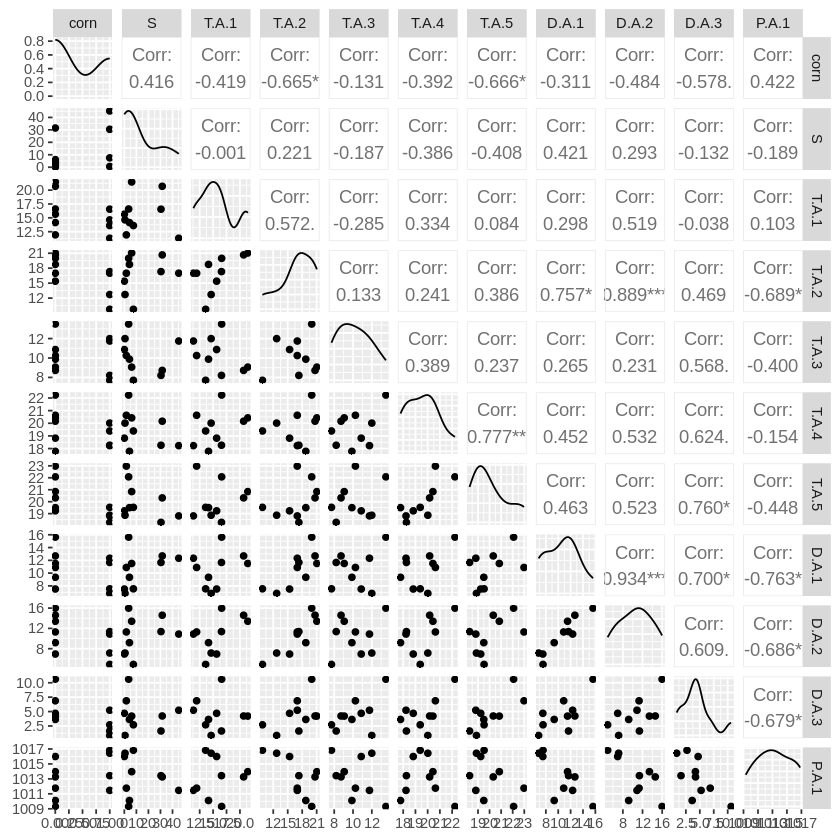

In [ ]:
num_cols <- FHBdataset %>% select(where(is.numeric), -corn) %>% names() %>% head(10)
GGally::ggpairs(FHBdataset, columns = c("corn", num_cols))

## **2. Divide and conquer!**

In this step, we will split the FHB dataset into a sub set of the data that will be used for training an algorithm (training dataset) and the remaining data for testing the performance of the model (test dataset).

 - Which percentage of the FHB dataset is assigned to training the model?
 - Which type of cross-validation approach are we using this exercise?

In [ ]:
index <- createDataPartition(FHBdataset$corn, p = 0.8, list = FALSE)
train  <- FHBdataset[index, ]
test   <- FHBdataset[-index, ]

## 3 Identifying highly correlated predictors

One of the issues when working with datasets that have multiple features (or predictor variables) is multicollinearity.

Below, using a correlation heat-map, we compare the level of correlation between 15 randomly selected features in the dataset.

Which pair of predictors do you think would suffer the issue of multicollinearity in the model?

Why did we choose 15 predictors for comparison?

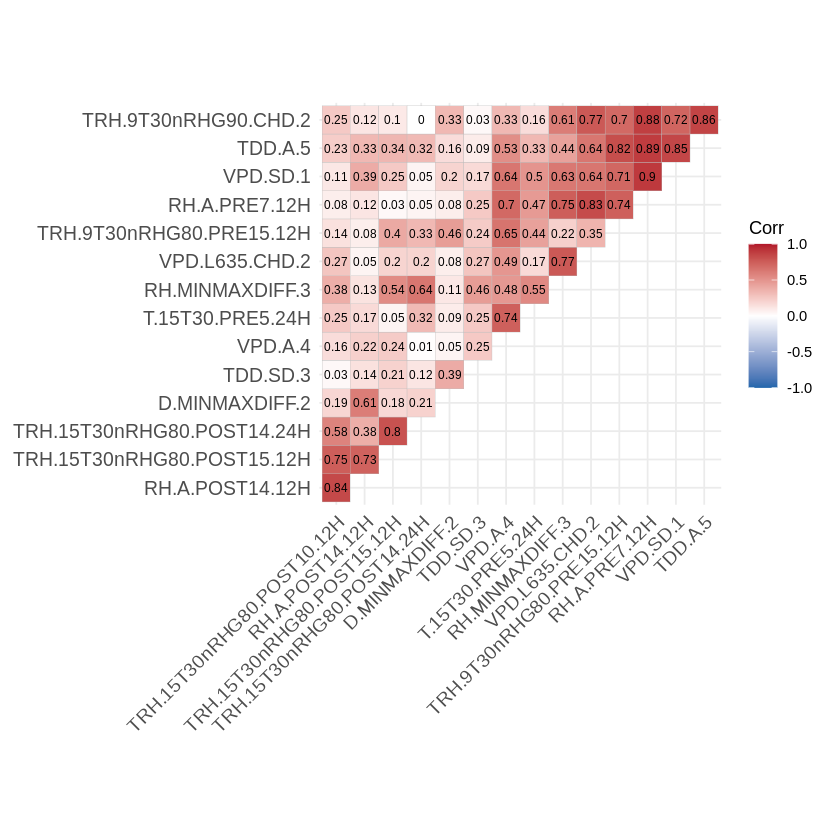

In [ ]:
## ── Compact correlation heat-map for a *handful* of predictors ─────────────
## Randomly selects `k` predictor columns so the plot is readable.
## Change `k` and `seed` as you wish.

# settings ------------------------------------------------------------
k       <- 15      # how many predictors to display
seed    <- 158      # set NULL for a different random draw each time
thr_lab <- 45       # base text-size factor for axis labels

if (!is.null(seed)) set.seed(seed)

# 1. pick k predictors at random --------------------------------------
all_preds   <- setdiff(colnames(train), "corn")
k           <- min(k, length(all_preds))   # just in case k > available
vars        <- sample(all_preds, k)

# 2. correlation matrix on that subset --------------------------------
xtrain_sub  <- train[, vars, drop = FALSE]
abs_cor     <- abs(cor(xtrain_sub, use = "pairwise.complete.obs"))
abs_cor[is.na(abs_cor)] <- 0

# 3. plot --------------------------------------------------------------
if (ncol(abs_cor) < 2) {
  message("Too few variables retained → skipping heat-map.")
} else {
  library(ggcorrplot)
  plot_obj <- ggcorrplot(
    abs_cor,
    hc.order  = TRUE,
    type      = "upper",
    show.diag = FALSE,
    lab       = TRUE,
    lab_size  = 2.5,
    tl.cex    = thr_lab / sqrt(k),
    colors    = c("#2166ac", "white", "#b2182b")
  )
  print(plot_obj)
}


In [ ]:
# Identify which features are highly correlated (i.e., correlation is greater than 0.9)
cor_mat <- abs(cor(xtrain_sub, use = "pairwise.complete.obs"))
high_cor <- findCorrelation(cor_mat, cutoff = 0.9, verbose = FALSE, names = TRUE)
cat(length(high_cor), "highly‑correlated predictors removed.\n")
# Exclude highly correlated features from the training dataset
train_f <- train %>% select(-all_of(high_cor))
test_f  <-  test  %>% select(-all_of(high_cor))

0 highly‑correlated predictors removed.



## 4 Feature‑selection pipelines

### 4.1 Boruta

Warning message in addShadowsAndGetImp(decReg, runs):
“getImp result contains NA(s) or NaN(s); replacing with 0(s), yet this is suspicious.”
Warning message in addShadowsAndGetImp(decReg, runs):
“getImp result contains NA(s) or NaN(s); replacing with 0(s), yet this is suspicious.”
Warning message in addShadowsAndGetImp(decReg, runs):
“getImp result contains NA(s) or NaN(s); replacing with 0(s), yet this is suspicious.”
Warning message in addShadowsAndGetImp(decReg, runs):
“getImp result contains NA(s) or NaN(s); replacing with 0(s), yet this is suspicious.”
Warning message in addShadowsAndGetImp(decReg, runs):
“getImp result contains NA(s) or NaN(s); replacing with 0(s), yet this is suspicious.”
Warning message in addShadowsAndGetImp(decReg, runs):
“getImp result contains NA(s) or NaN(s); replacing with 0(s), yet this is suspicious.”
Warning message in addShadowsAndGetImp(decReg, runs):
“getImp result contains NA(s) or NaN(s); replacing with 0(s), yet this is suspicious.”
Warning messa

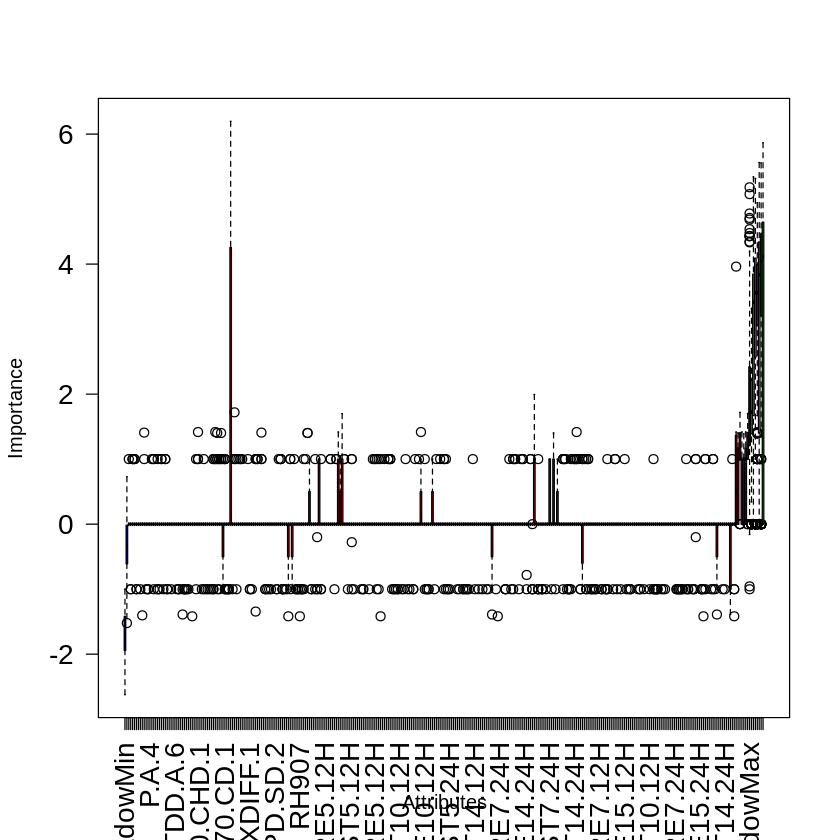

In [ ]:
bor <- Boruta(corn ~ ., data = train_f, doTrace = 0, maxRuns = 150)
plot(bor, las = 2, cex.axis = 1.4)
bor_imp <- attStats(bor) %>% rownames_to_column("feature") %>% filter(decision == "Confirmed")

### 4.2 varSelRF (Variable selection from random forests using OOB error)

In [ ]:
vsrf <- varSelRF(xdata = train_f %>% select(-corn) %>% as.data.frame(),
                 Class = factor(train_f$corn),
                 ntree = 500, ntreeIterat = 100)
vsrf_imp <- tibble(feature = vsrf$selected.vars)
print(vsrf_imp)

# A tibble: 2 × 1
  feature        
  <chr>          
1 VPD.A.PRE10.12H
2 VPD.L6.CD.1    


### 4.3 VSURF (Variable selection using random forests)

In [ ]:
vs <- VSURF(x = train_f %>% select(-corn), y = factor(train_f$corn), verbose = FALSE)
vs_imp <- tibble(feature = names(train_f)[vs$varselect.interp])
print(vs_imp)

# A tibble: 1 × 1
  feature
  <chr>  
1 RH.A.3 


### 4.4 Intersect & compare

[1] "VPD.MINMAXDIFF.1" "VPD.A.PRE14.12H"  "DD.A.PRE14.12H"

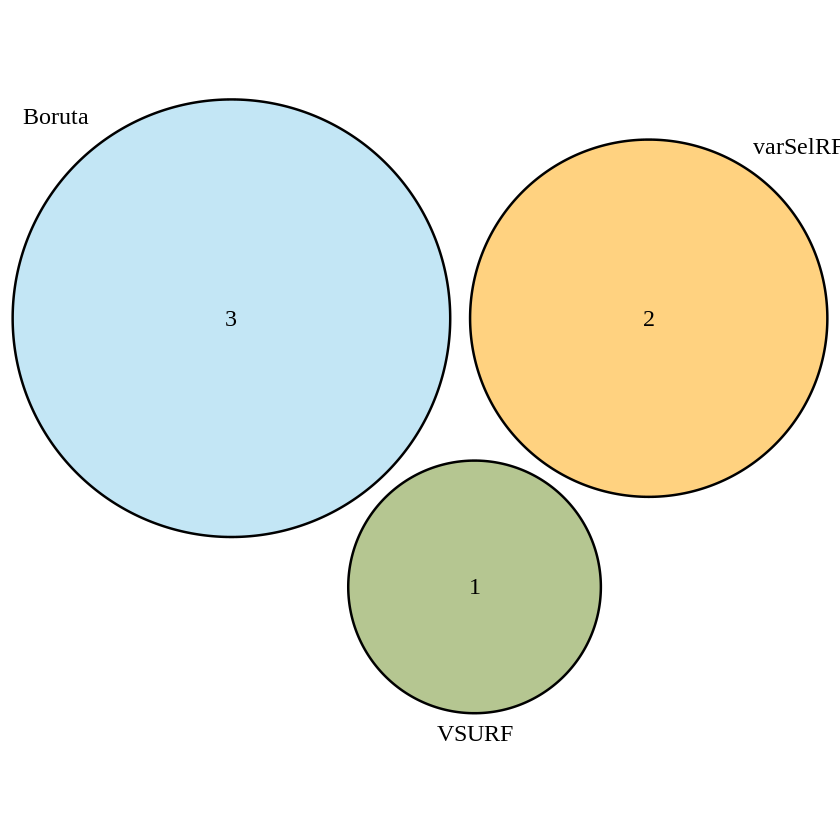

In [ ]:
# ── Compare feature‑selection outputs ──────────────────────────
# We visualise ALL three sets but **build models from the
# intersection of Boruta ∩ varSelRF**.
sets <- list(
  Boruta   = bor_imp$feature,
  varSelRF = vsrf_imp$feature,
  VSURF    = vs_imp$feature
)
venn.plot <- venn.diagram(sets, filename = NULL,
                          fill = c("skyblue", "orange", "olivedrab"),
                          alpha = 0.5, cex = 1.2, cat.cex = 1.2)
grid::grid.draw(venn.plot)

# --------------------------------------------------------------
# Intersection of Boruta and varSelRF only
# --------------------------------------------------------------
common5 <- intersect(bor_imp$feature, vsrf_imp$feature)

# If <5 variables intersect, top‑up with additional Boruta vars
if (length(common5) < 5) {
  extras   <- setdiff(bor_imp$feature, common5)
  need_add <- min(5 - length(common5), length(extras))
  common5  <- c(common5, extras[seq_len(need_add)])
}

common5 <- common5[1:min(5, length(common5))]
common5

## 5 Building your first random‑forest model

In [ ]:
# Training a random forest
ctrl <- trainControl(method = "repeatedcv", number = 5, repeats = 3,
                     classProbs = TRUE, summaryFunction = twoClassSummary,
                     savePredictions = "final")
train_baseline <- train_f %>%
  select(all_of(common5), corn) %>%
  as.data.frame()
baseline <- train(x = train_baseline %>% select(-corn),
                  y = factor(train_baseline$corn, levels = c(0,1), labels = c("no","yes")),
                  method = "ranger", # This is a random forest method
                  metric = "ROC", # This is the method used to measure accuracy
                  trControl = ctrl, # This is the sampling space for cross-validation
                  tuneGrid = data.frame(mtry = floor(sqrt(length(common5))),
                                        splitrule = "gini", min.node.size = 1))
baseline

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


Random Forest 

8 samples
3 predictors
2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 6, 6, 7, 6, 7, 6, ... 
Resampling results:

  ROC  Sens  Spec
  1    1     1   

Tuning parameter 'mtry' was held constant at a value of 1
Tuning
 parameter 'splitrule' was held constant at a value of gini
Tuning
 parameter 'min.node.size' was held constant at a value of 1

Setting levels: control = 0, case = 1

Setting direction: controls < cases



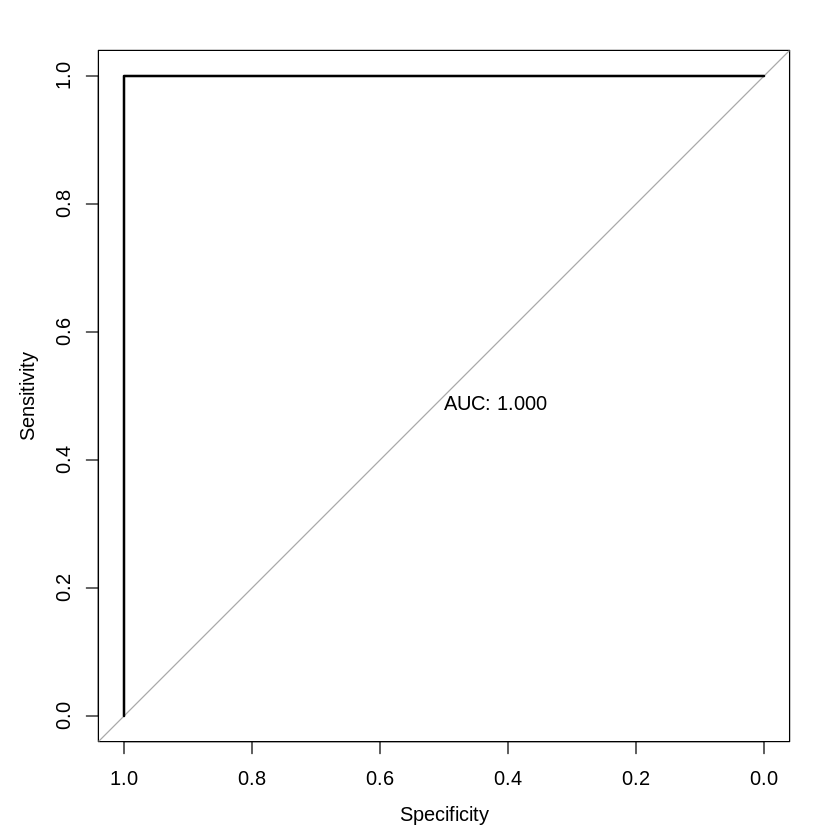

In [ ]:
# Predicting epidemics based on unseen (or test) data
prob <- predict(baseline, test_f %>% select(all_of(common5)), type = "prob")[,"yes"]
# Measuring the accuracy of the predictions
plot(roc(test_f$corn, prob), print.auc = TRUE)


## 6 Competition block – hyper‑parameter tuning

> **How the mini‑competition works**
>
> 1.  **Team up** (2–4 people) and duplicate this notebook (or just edit
>     locally).
> 2.  Modify **`my_grid`** below to explore different hyper‑parameter
>     combinations for the Ranger (Random‑Forest) model. ── *Tip: start
>     small to keep run‑time ≤5 min.*
> 3.  Knit or run the competition chunk. Record the **mean
>     cross‑validated ROC‑AUC** displayed by `print(comp_model)`.
> 4.  Optional quick‑checks:
>     -   Look at `comp_model$results` to see which combo scored best.
>     -   Inspect `varImp(comp_model)` for feature influence.
> 5.  Submit your best **AUC** to the session leaderboard.
>
> In the table below are some **hyper‑parameters** that can be used in the random forest when using the ranger method:

| name            | effect                                                                                                   |
| --------------- | --------------------------------------------------------------------------------------------------------- |
| `mtry`          | Number of predictors considered at each split. Smaller → lower variance but ↑ bias.                      |
| `splitrule`     | Criterion: `gini` (default) or `extratrees` (more random, can reduce variance).                           |
| `min.node.size` | Minimum observations in terminal nodes. Larger → shallower trees, faster.                                 |
| `num.trees`     | Total trees (keep ≤ 1000 for speed). You can change this argument in the call.                            |


>
> ⚡ **Strategy hints**
* Begin with a coarse grid (e.g., 2–4 values
> for each parameter).
* Once you find a promising region, narrow‑focus
> (e.g., fix `splitrule` that wins and refine `mtry`).
* Averaged AUC
> tends to stabilise beyond \~500 trees; extra trees rarely hurt but
> cost time.
* If class imbalance hurts AUC, add `case.weights` or use
> `splitrule = "extratrees"` + smaller `min.node.size`.
>
> **Advanced (optional)**
* Swap `method = "ranger"` for
> `method = "xgbTree"` (gradient boosting) and tune `eta`, `max_depth`,
> `nrounds`.
* Explore **random search** via `search = "random"` in
> `trainControl()` with `tuneLength` parameter.
* Try **LOOCV** or **spatial CV** if your data has location tags.

In [ ]:
# Defining the hyperparameter space
my_grid <- expand.grid(mtry = c(2,3,4),
                       splitrule = c("gini","extratrees"),
                       min.node.size = c(5, 100))
comp_model <- train(x = train_f %>% select(all_of(common5)) %>% as.data.frame(),
                    y = factor(train_f$corn, levels = c(0,1), labels = c("no","yes")),
                    method = "ranger", metric = "ROC", num.trees = 800,
                    trControl = ctrl, tuneGrid = my_grid)
print(comp_model)

Warning message:
“model fit failed for Fold1.Rep1: mtry=4, splitrule=gini, min.node.size=  5 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
”
Warning message:
“model fit failed for Fold1.Rep1: mtry=4, splitrule=extratrees, min.node.size=  5 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
”
Warning message:
“model fit failed for Fold1.Rep1: mtry=4, splitrule=gini, min.node.size=100 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
”
Warning message:
“model fit failed for Fold1.Rep1: mtry=4, splitrule=extratrees, min.node.size=100 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
”
Warning message:
“model fit failed for Fold2.Rep1: mtry=4, splitrule=gini, min.node.size=  5 Error in ranger::ranger(dependent.variable.name = ".outcome", data 

Random Forest 

8 samples
3 predictors
2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 3 times) 
Summary of sample sizes: 7, 6, 6, 6, 7, 6, ... 
Resampling results across tuning parameters:

  mtry  splitrule   min.node.size  ROC  Sens       Spec
  2     gini          5            1.0  1.0000000    1 
  2     gini        100            0.5  1.0000000    0 
  2     extratrees    5            1.0  0.8666667    1 
  2     extratrees  100            0.5  1.0000000    0 
  3     gini          5            1.0  1.0000000    1 
  3     gini        100            0.5  1.0000000    0 
  3     extratrees    5            1.0  0.8666667    1 
  3     extratrees  100            0.5  1.0000000    0 
  4     gini          5            NaN        NaN  NaN 
  4     gini        100            NaN        NaN  NaN 
  4     extratrees    5            NaN        NaN  NaN 
  4     extratrees  100            NaN        NaN  NaN 

ROC was used to select the optimal mode

------------------------------------------------------------------------

## 7 Interpreting variable "influence" with SHAP values

> The fastshap::explain() function is used to compute fast (approximate) Shapley values for a set of features in a supervised learning model like random forest. These values help to explain the predictions of "black box" models by attributing the contribution of each feature to a given prediction.

Positive SHAP values indicate that the predictor variable is expected to increase the likelihood of epidemic occurring.

Negative SHAP values indicate that the predictor variable is expect to decrease the likelihood of epidemic occuring.

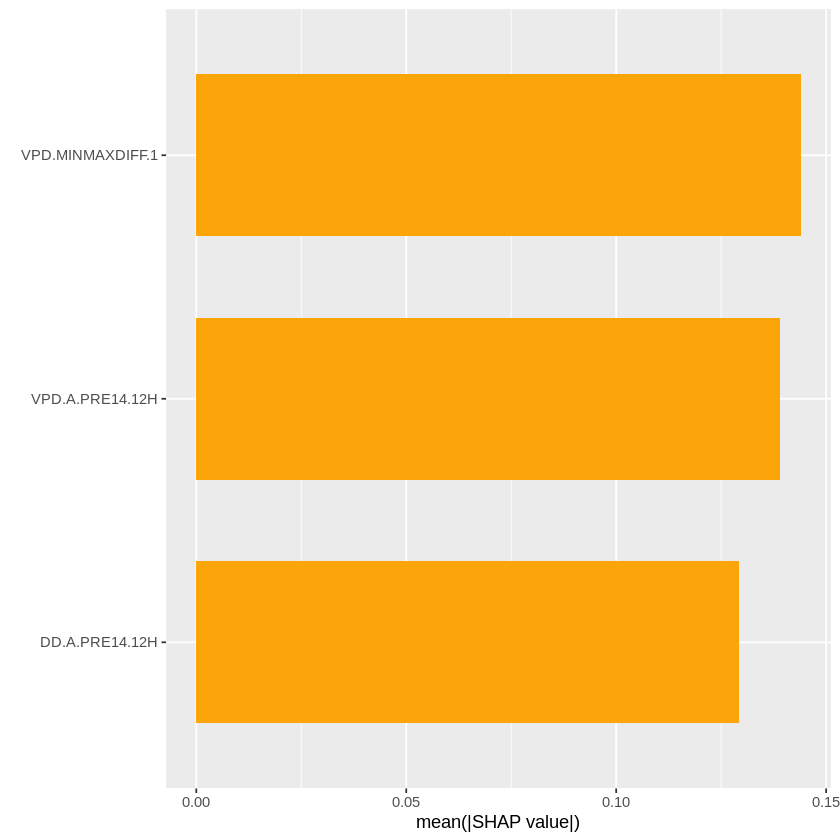

In [ ]:
extras <- c("fastshap", "shapviz")
inst <- extras[!(extras %in% installed.packages()[,"Package"])]
if (length(inst)) install.packages(inst, repos = "https://cloud.r-project.org")

library(fastshap)
library(shapviz)

prob_yes <- function(model, newdata) predict(model, newdata, type = "prob")[,"yes"]
X_train <- train_f %>% select(all_of(common5))
shap_val <- fastshap::explain(object = baseline, feature_names = names(X_train),
                              X = X_train, pred_wrapper = prob_yes, nsim = 200)
sv <- shapviz(shap_val, X = X_train)
sv_importance(sv, kind = "bar")

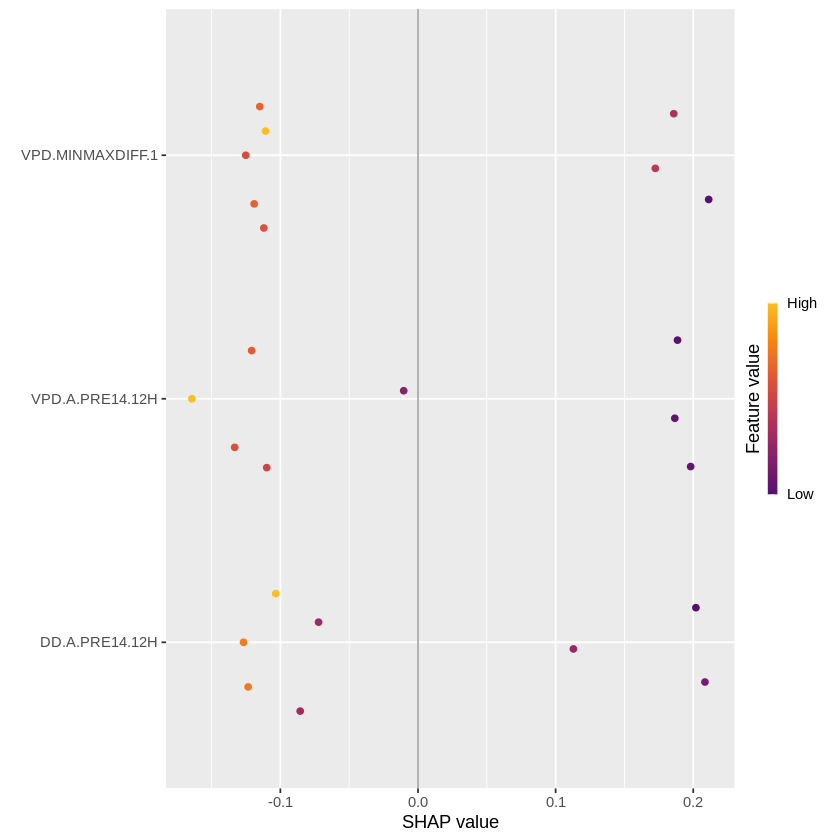

In [ ]:
# 🐝 Flexible beeswarm plot – adapts to shapviz version
plot_beeswarm_safe <- function(sv_obj, max_display = 10) {
  ns <- "package:shapviz"
  if ("sv_beeswarm" %in% ls(ns)) {
    return(shapviz::sv_beeswarm(sv_obj, max_display = max_display))
  }
  if ("sv_plot" %in% ls(ns)) {
    return(shapviz::sv_plot(sv_obj, type = "beeswarm", max_display = max_display))
  }
  # As a last resort, try importance‑style beeswarm if available
  if ("sv_importance" %in% ls(ns)) {
    return(shapviz::sv_importance(sv_obj, kind = "beeswarm", max_display = max_display))
  }
  message("No beeswarm function detected → showing bar plot as fallback.")
  shapviz::sv_importance(sv_obj, kind = "bar", max_display = max_display)
}

plot_beeswarm_safe(sv, max_display = length(common5))